In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
#now we have to take a data set
data=pd.DataFrame({'age':[20,21,22,23,24,25,26,27,28,29,30,50]})
data

,age
0,20
1,21
2,22
3,23
4,24
5,25
6,26
7,27
8,28
9,29


<Axes: xlabel='age', ylabel='Count'>

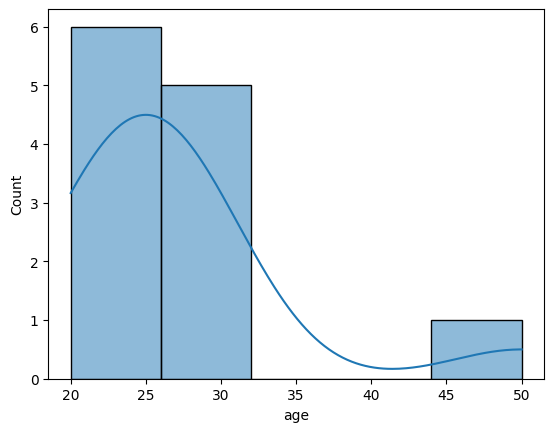

In [5]:
sns.histplot(data['age'], bins=5, kde=True)

<Axes: ylabel='age'>

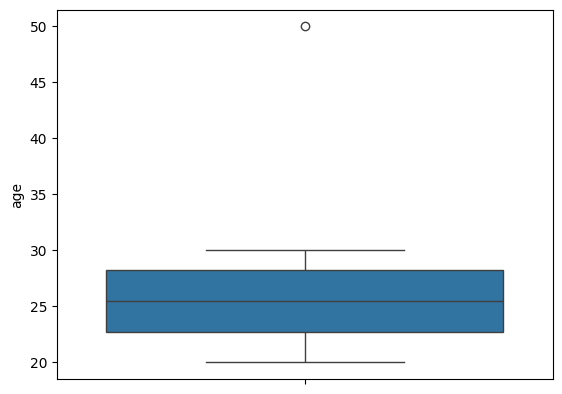

In [6]:
sns.boxplot(data['age'])

In [ ]:
###calculate the mean and standard deivation

In [7]:
data['mean']=np.mean(data['age'])
data['std']=np.std(data['age'])

#calculate the z-score
data['z_score']=(data['age']-data['mean'])/data['std']
data

,age,mean,std,z_score
0,20,27.083333,7.543853,-0.938954
1,21,27.083333,7.543853,-0.806396
2,22,27.083333,7.543853,-0.673838
3,23,27.083333,7.543853,-0.541280
4,24,27.083333,7.543853,-0.408721
5,25,27.083333,7.543853,-0.276163
6,26,27.083333,7.543853,-0.143605
7,27,27.083333,7.543853,-0.011047
8,28,27.083333,7.543853,0.121512
9,29,27.083333,7.543853,0.254070


In [8]:
#print the outliers
print(f'here are the outliers based on z-score threshold 3:\n {data[data["z_score"]>3]}')

here are the outliers based on z-score threshold 3:
     age       mean       std   z_score
11   50  27.083333  7.543853  3.037793


In [9]:
#To remove the outliers
data=data[data['z_score']<3]
print(f'here is the data without outliers:\n {data}')

here is the data without outliers:
     age       mean       std   z_score
0    20  27.083333  7.543853 -0.938954
1    21  27.083333  7.543853 -0.806396
2    22  27.083333  7.543853 -0.673838
3    23  27.083333  7.543853 -0.541280
4    24  27.083333  7.543853 -0.408721
5    25  27.083333  7.543853 -0.276163
6    26  27.083333  7.543853 -0.143605
7    27  27.083333  7.543853 -0.011047
8    28  27.083333  7.543853  0.121512
9    29  27.083333  7.543853  0.254070
10   30  27.083333  7.543853  0.386628


In [10]:
#Now again we have to take a data set
import scipy.stats as stats

In [11]:
data=[2.5,2.8,2.7,3.0,3.2,3.4,3.6,3.8,4.0,110,0]

In [12]:
z_score=np.abs(stats.zscore(data))

In [13]:
#to identify outliers set a threhold
threshold=2.5
outliers=np.where(z_score >threshold)[0]

In [14]:
print("...............................")
print('data:', data)
print('............................')


print('indices of outliers :', outliers)
print('outliers', [data[i] for i in outliers])


#remove outliers
data= [data[i] for i in range(len(data)) if i not in outliers]
print('data without the outliers', data)

...............................
data: [2.5, 2.8, 2.7, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 110, 0]
............................
indices of outliers : [9]
outliers [110]
data without the outliers [2.5, 2.8, 2.7, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 0]


In [ ]:
#calculate by IQR
#again we have to take a data set

In [15]:
data=pd.DataFrame({'age':[20,21,22,23,24,25,26,27,28,29,30,50]})


In [16]:
#now to calculate the 1st and 3rd quartile
q1=np.percentile(data['age'], 25, interpolation='midpoint')
q3=np.percentile(data['age'], 75, interpolation='midpoint')

In [17]:
IQR=q3-q1

In [18]:
#now calculate the lower and upper bound
lower_bound=q1-1.5*IQR
upper_bound=q3+1.5*IQR

In [24]:
print("...............................")
print(f'here is the data with outliers :\n {data}')
#print(f'here are the outliers based on the IQR threshold :\n {data[(data["age"] < lower_bound)[1.5]]}............................')
print(f'here are the outliers based on the IQR threshold :\n {data[(data["age"] < lower_bound) | (data["age"] > upper_bound)]}')
data=data[(data["age"] > lower_bound) & (data["age"] < upper_bound)]
print('data without the outliers', data)

...............................
here is the data with outliers :
     age
0    20
1    21
2    22
3    23
4    24
5    25
6    26
7    27
8    28
9    29
10   30
11   50
here are the outliers based on the IQR threshold :
     age
11   50
data without the outliers     age
0    20
1    21
2    22
3    23
4    24
5    25
6    26
7    27
8    28
9    29
10   30


In [31]:
#import library
from sklearn.cluster import KMeans
data=[[2,2],[3,3],[3,4],[30,30],[31,31],[32,32]]

#create a k-mean model with two cluseters (normal and outliers)
kmeans=KMeans(n_clusters=2, n_init=10)
kmeans.fit(data)



KMeans(n_clusters=2, n_init=10)

In [35]:
#predict cluster label
labels=kmeans.predict(data)

In [36]:
#identify outliers based on cluster label
outliers=[data[i] for i, label in enumerate (labels) if label==1]
print('data :',data)
print('outliers:', outliers)
#remove outliers
data=[data[i] for i, label in enumerate(labels) if label==0]
print('data without outliers:', data)

data : [[2, 2], [3, 3], [3, 4]]
outliers: []
data without outliers: [[2, 2], [3, 3], [3, 4]]
